In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)

In [3]:
y = 4 + 3 * X + np.random.randn(100, 1)

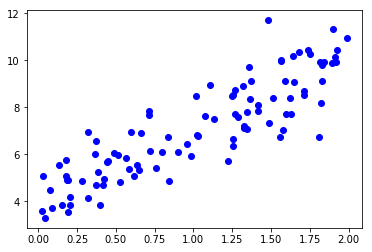

In [4]:
plt.plot(X, y, 'bo')

In [5]:
X_b = np.c_[np.ones((100, 1)), X]

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.0289079 ],
       [3.02417498]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

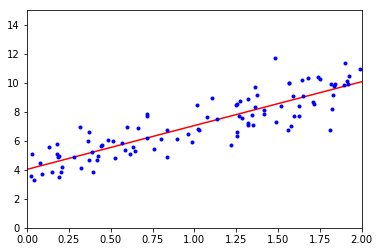

In [9]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.0289079]), array([[3.02417498]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.0289079 ],
       [10.07725786]])

### Gradient Descent

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [15]:
theta = np.random.randn(2,1) # random initialization

In [16]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [17]:
theta

array([[4.0289079 ],
       [3.02417498]])

### Stochastic GD

In [18]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

In [19]:
theta = np.random.randn(2, 1)

In [20]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [21]:
theta

array([[4.04788468],
       [2.98824299]])

In [22]:
from sklearn.linear_model import SGDRegressor

In [23]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [24]:
sgd_reg.fit(X, y.ravel())

C:\Users\demjanchuk\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.02840787]), array([3.02199519]))

In [26]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

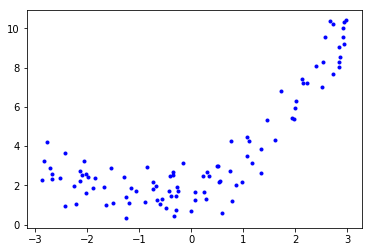

In [27]:
plt.plot(X, y, 'b.')

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_fetures = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_fetures.fit_transform(X)

In [30]:
X[0]

array([2.40020282])

In [31]:
X_poly[0]

array([2.40020282, 5.76097356])

In [32]:
lin_reg = LinearRegression()

In [33]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lin_reg.intercept_, lin_reg.coef_

(array([1.84010455]), array([[1.03891477, 0.55468905]]))

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [48]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, 80, 0, 4])

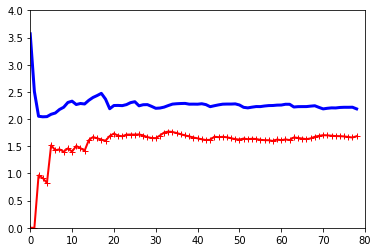

In [49]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
polynomial_regression = Pipeline((
    ("poly_fetures", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ))

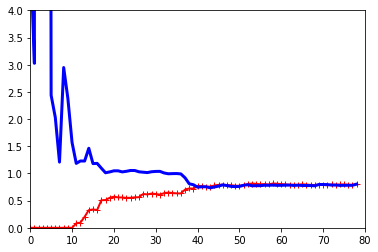

In [50]:
plot_learning_curves(polynomial_regression, X, y)

### Regulirized

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [53]:
ridge_reg.predict([[1.5]])

array([[5.37094203]])

In [56]:
sgd_reg = SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [57]:
sgd_reg.predict([[1.5]])

array([5.32699993])

###  Lasso or L1 reg

In [58]:
from sklearn.linear_model import Lasso

In [59]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
lasso_reg.predict([[1.5]])

array([5.33084736])

In [61]:
from sklearn.linear_model import ElasticNet

In [62]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
elastic_net.predict([[1.5]])

array([5.32645164])